In [174]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

In [175]:
df = pd.read_csv('parsed.csv')
df

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,МИЭЛЬ,real_estate_agent,https://mytishchi.cian.ru/sale/flat/308939371/,Мытищи,sale,flat,8,14,2,69.7,...,-1,38 м²,"10,5 м²",79672094035,-1,NaN,Юбилейная,6,Медведково,Ярославский
8389,ПИК,developer,https://mytishchi.cian.ru/sale/flat/306943495/,Мытищи,sale,flat,19,25,2,48.1,...,Чистовая,"22,7 м²","16,1 м²",74951370494,"2,62 м",NaN,NaN,NaN,Ростокино,Ярославский квартал ЖК
8390,ID 47276638,homeowner,https://mytishchi.cian.ru/sale/flat/294184046/,Мытищи,sale,flat,3,5,2,45.0,...,-1,-1,6 м²,79153266030,-1,NaN,Юбилейная,11к3,Медведково,NaN
8391,EstateLiga,real_estate_agent,https://mytishchi.cian.ru/sale/flat/304572510/,Мытищи,sale,flat,3,6,2,34.0,...,-1,19 м²,8 м²,79651097781,"2,75 м",NaN,бульвар Тенистый,5,Медведково,Императорские Мытищи


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   author                7592 non-null   object
 1   author_type           7595 non-null   object
 2   url                   7906 non-null   object
 3   location              7906 non-null   object
 4   deal_type             7906 non-null   object
 5   accommodation_type    7906 non-null   object
 6   floor                 7906 non-null   object
 7   floors_count          7906 non-null   object
 8   rooms_count           7906 non-null   object
 9   total_meters          7906 non-null   object
 10  price                 7893 non-null   object
 11  year_of_construction  7906 non-null   object
 12  object_type           7906 non-null   object
 13  have_loggia           7906 non-null   object
 14  parking_type          7906 non-null   object
 15  house_material_type   7906 non-null   

In [177]:
columns = list(df.columns)
print(columns)
df = df.drop([ 'author', 'author_type', 'url', 'phone', 'deal_type', 'accommodation_type', 'house_number'], axis=1)
columns = list(df.columns)
print(columns)


['author', 'author_type', 'url', 'location', 'deal_type', 'accommodation_type', 'floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'year_of_construction', 'object_type', 'have_loggia', 'parking_type', 'house_material_type', 'heating_type', 'finish_type', 'living_meters', 'kitchen_meters', 'phone', 'ceiling_height', 'district', 'street', 'house_number', 'underground', 'residential_complex']
['location', 'floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'year_of_construction', 'object_type', 'have_loggia', 'parking_type', 'house_material_type', 'heating_type', 'finish_type', 'living_meters', 'kitchen_meters', 'ceiling_height', 'district', 'street', 'underground', 'residential_complex']


<Axes: >

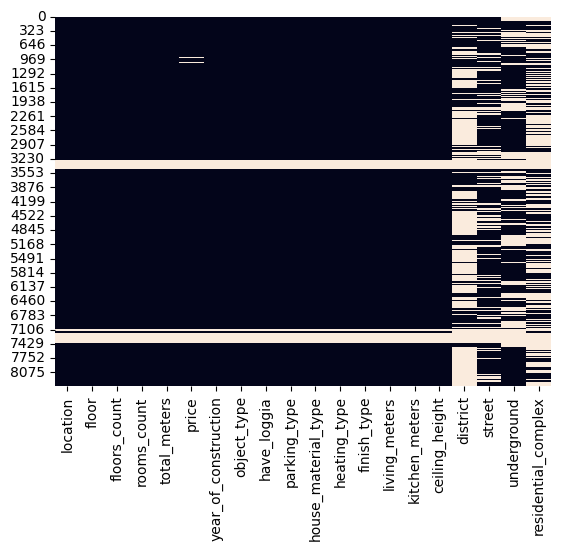

In [178]:
sns.heatmap(df.isnull(), cbar=False)

In [179]:
df_cleaned = df.dropna(thresh=2)

<Axes: >

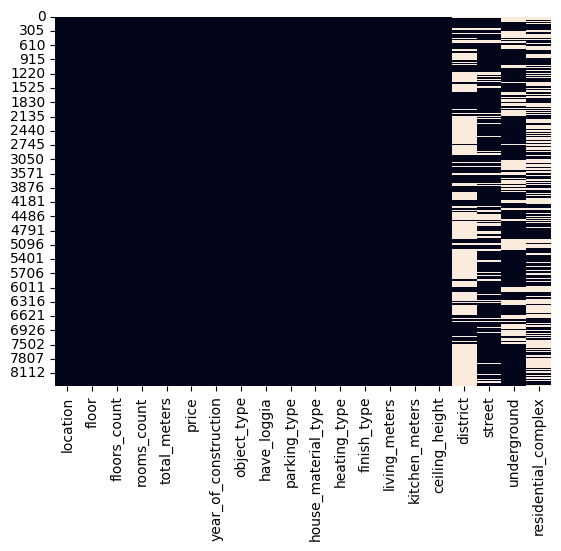

In [180]:
sns.heatmap(df_cleaned.isnull(), cbar=False)

<Axes: >

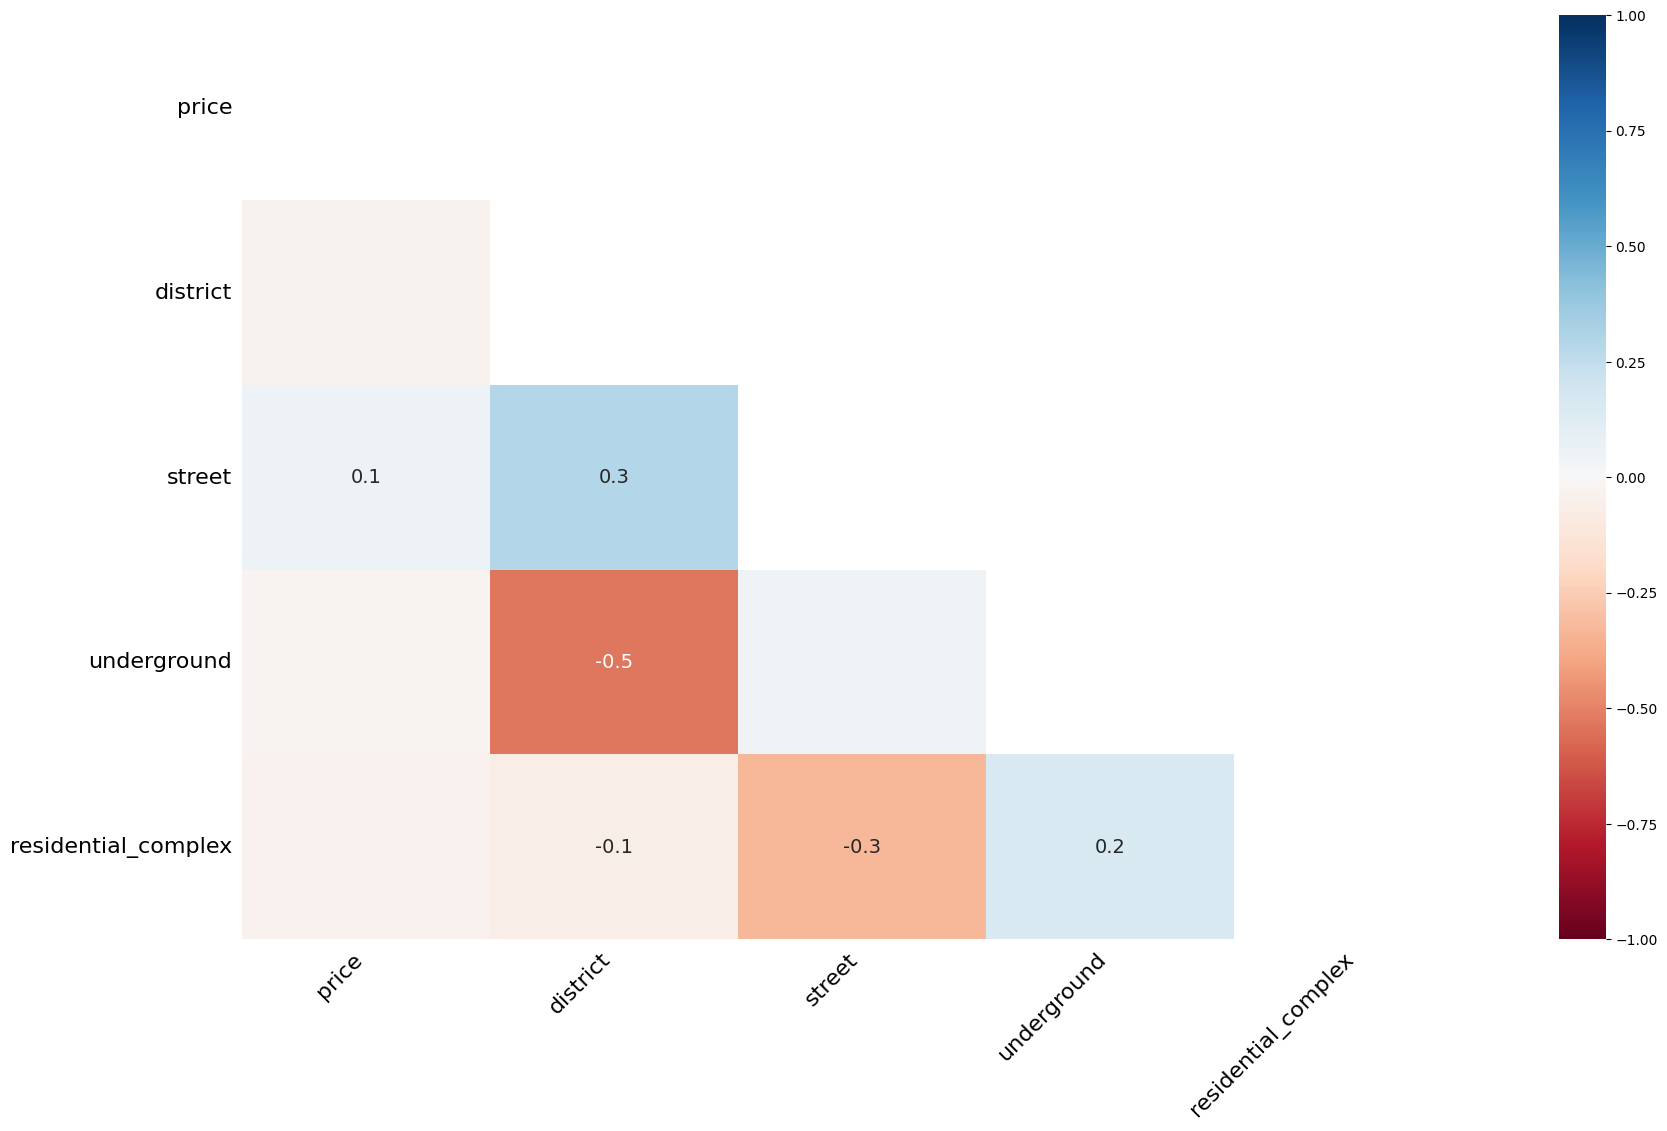

In [181]:
msno.heatmap(df_cleaned, labels = True)

In [182]:
for column in df.columns:
  df[column].replace('-1', np.nan, inplace=True)

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_19496\2458750388.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace('-1', np.nan, inplace=True)


In [183]:
df.head(20)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,house_material_type,heating_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,Серпухов,6,6,1,20.7,2350000,1917,Вторичка,NaN,Наземная,NaN,NaN,NaN,18 м²,1 м²,3 м,Серпухов,Крюкова,NaN,NaN
1,Серпухов,1,9,1,33.0,4150000,1975,Вторичка,NaN,NaN,NaN,NaN,NaN,18 м²,6 м²,"2,7 м",NaN,Ворошилова,Аннино,NaN
2,Серпухов,4,4,1,14.0,1700000,NaN,Вторичка,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,Серпухов,5,5,1,17.5,2500000,1968,Вторичка,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Серпухов,Российская,NaN,NaN
4,Серпухов,4,7,1,25.9,3000000,2009,Вторичка,NaN,Наземная,NaN,NaN,NaN,20 м²,5 м²,"3,5 м",Серпухов,Химиков,NaN,NaN
5,Серпухов,2,3,1,46.7,6599999,NaN,Вторичка,NaN,NaN,NaN,NaN,NaN,25 м²,6 м²,NaN,Серпухов,2-я Московская,NaN,NaN
6,Серпухов,3,5,1,29.0,3350000,1917,Вторичка,NaN,Наземная,NaN,NaN,NaN,25 м²,NaN,3 м,Серпухов,Форсса,NaN,NaN
7,Серпухов,3,6,1,19.1,3600000,1917,Вторичка,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Серпухов,Крюкова,NaN,NaN
8,Серпухов,1,2,1,27.1,1900000,1969,Вторичка,NaN,Наземная,NaN,NaN,NaN,18 м²,6 м²,"2,5 м",NaN,NaN,NaN,NaN
9,Серпухов,6,9,2,42.7,3990000,1980,Вторичка,1 лоджия,Наземная,NaN,NaN,NaN,"29,7 м²","5,6 м²","2,7 м",Серпухов,Весенняя,NaN,NaN


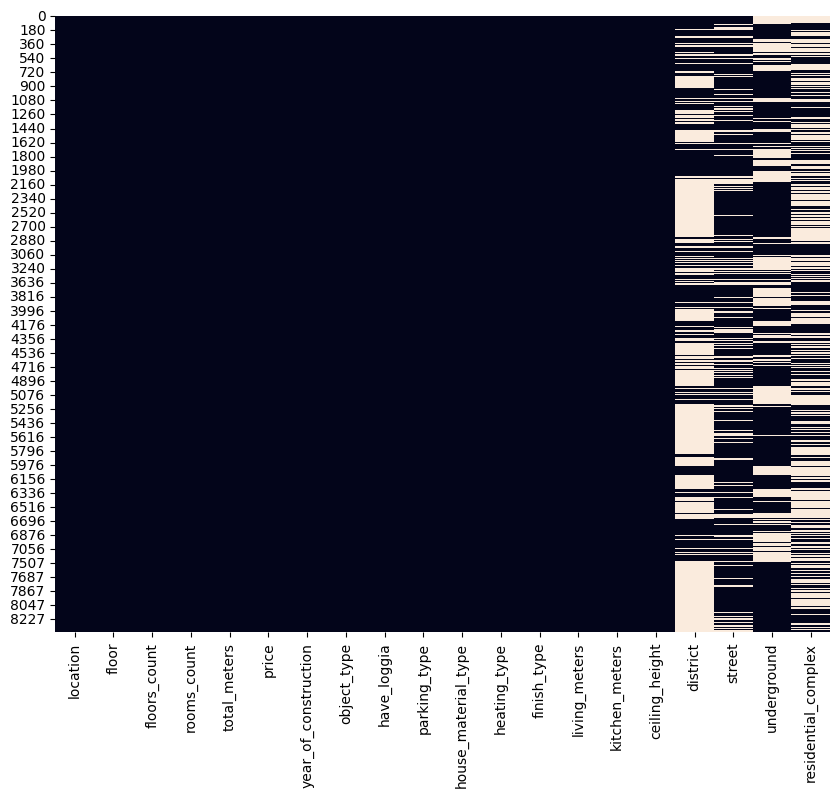

In [184]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.isnull(), cbar=False)
plt.show()

<Axes: >

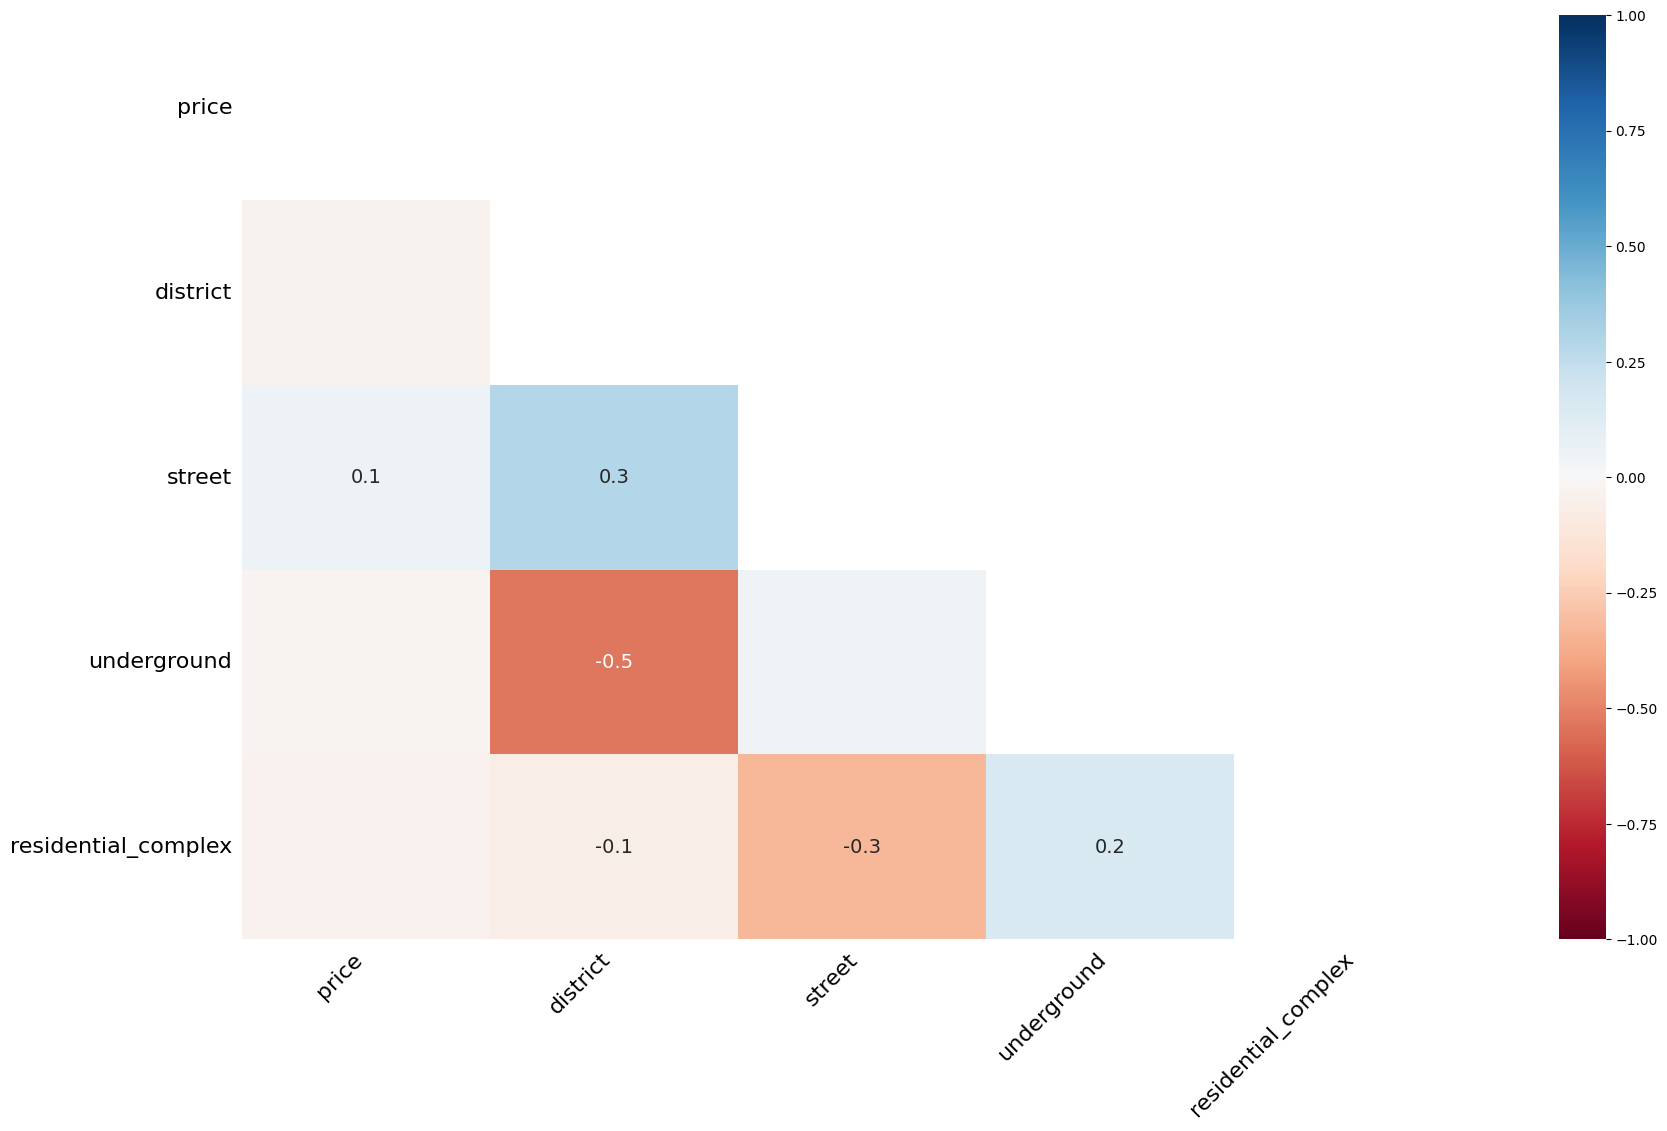

In [185]:
msno.heatmap(df_cleaned, labels = True)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7906 non-null   object
 1   floor                 7906 non-null   object
 2   floors_count          7906 non-null   object
 3   rooms_count           7806 non-null   object
 4   total_meters          7906 non-null   object
 5   price                 7893 non-null   object
 6   year_of_construction  6537 non-null   object
 7   object_type           7906 non-null   object
 8   have_loggia           4498 non-null   object
 9   parking_type          4412 non-null   object
 10  house_material_type   1447 non-null   object
 11  heating_type          1 non-null      object
 12  finish_type           2006 non-null   object
 13  living_meters         6124 non-null   object
 14  kitchen_meters        6555 non-null   object
 15  ceiling_height        5135 non-null   

In [187]:
df_cleaned = df.dropna(axis=1, how='all')

<Axes: >

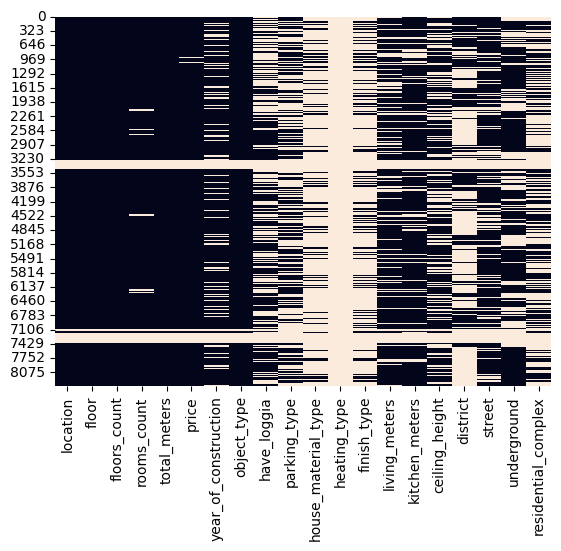

In [188]:
sns.heatmap(df_cleaned.isnull(), cbar=False)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7906 non-null   object
 1   floor                 7906 non-null   object
 2   floors_count          7906 non-null   object
 3   rooms_count           7806 non-null   object
 4   total_meters          7906 non-null   object
 5   price                 7893 non-null   object
 6   year_of_construction  6537 non-null   object
 7   object_type           7906 non-null   object
 8   have_loggia           4498 non-null   object
 9   parking_type          4412 non-null   object
 10  house_material_type   1447 non-null   object
 11  heating_type          1 non-null      object
 12  finish_type           2006 non-null   object
 13  living_meters         6124 non-null   object
 14  kitchen_meters        6555 non-null   object
 15  ceiling_height        5135 non-null   

In [190]:
df.head(10)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,house_material_type,heating_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,Серпухов,6,6,1,20.7,2350000,1917,Вторичка,NaN,Наземная,NaN,NaN,NaN,18 м²,1 м²,3 м,Серпухов,Крюкова,NaN,NaN
1,Серпухов,1,9,1,33.0,4150000,1975,Вторичка,NaN,NaN,NaN,NaN,NaN,18 м²,6 м²,"2,7 м",NaN,Ворошилова,Аннино,NaN
2,Серпухов,4,4,1,14.0,1700000,NaN,Вторичка,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Красный Текстильщик мкр,Красный Текстильщик,NaN,NaN
3,Серпухов,5,5,1,17.5,2500000,1968,Вторичка,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Серпухов,Российская,NaN,NaN
4,Серпухов,4,7,1,25.9,3000000,2009,Вторичка,NaN,Наземная,NaN,NaN,NaN,20 м²,5 м²,"3,5 м",Серпухов,Химиков,NaN,NaN
5,Серпухов,2,3,1,46.7,6599999,NaN,Вторичка,NaN,NaN,NaN,NaN,NaN,25 м²,6 м²,NaN,Серпухов,2-я Московская,NaN,NaN
6,Серпухов,3,5,1,29.0,3350000,1917,Вторичка,NaN,Наземная,NaN,NaN,NaN,25 м²,NaN,3 м,Серпухов,Форсса,NaN,NaN
7,Серпухов,3,6,1,19.1,3600000,1917,Вторичка,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Серпухов,Крюкова,NaN,NaN
8,Серпухов,1,2,1,27.1,1900000,1969,Вторичка,NaN,Наземная,NaN,NaN,NaN,18 м²,6 м²,"2,5 м",NaN,NaN,NaN,NaN
9,Серпухов,6,9,2,42.7,3990000,1980,Вторичка,1 лоджия,Наземная,NaN,NaN,NaN,"29,7 м²","5,6 м²","2,7 м",Серпухов,Весенняя,NaN,NaN
